In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
 

In [ ]:
def load_mnist_dataset():
  '''
  RETURN
    x_train: numpy array
    y_train: numpy array
    x_test: numpy array
    y_test: numpy array
  '''
  x_train, y_train, x_test, y_test = None, None, None, None
  # START CODE HERE
  (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
   
  # END CODE HERE
  return x_train, y_train, x_test, y_test

x_train, y_train, x_test, y_test = load_mnist_dataset()

In [ ]:
print("Shape of training set: ", x_train.shape)
print("Shape of testing set: ", x_test.shape)
print("Shape of training labels: ", y_train.shape)
print("Shape of testing labels: ", y_test.shape)

Shape of training set:  (60000, 28, 28)
Shape of testing set:  (10000, 28, 28)
Shape of training labels:  (60000,)
Shape of testing labels:  (10000,)


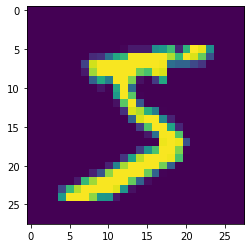

In [ ]:
plt.imshow(x_train[0])
plt.show()

In [ ]:
def one_hot_encoding(y_array):
  '''
  y_array: numpy array, shape = [N,]
  RETURN
    y_encoded_array: numpy array, shape = [N, 10]
  '''
  y_encoded_array = None
  
  #START CODE HERE
  y_encoded_array = []
  for i in y_array:
    arr = np.zeros(10)
    arr[i] = 1
    y_encoded_array.append(arr)
  y_encoded_array = np.array(y_encoded_array)
  
  #END CODE HERE
  
  return y_encoded_array
  

In [ ]:
y_encoded_train = one_hot_encoding(y_train)
y_encoded_test = one_hot_encoding(y_test)

print("{} becomes {}".format(y_train[3],y_encoded_train[3]))
print("{} becomes {}".format(y_test[45],y_encoded_test[45]))

1 becomes [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
5 becomes [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
def reshape_x(X):
  '''
  x: numpy array, shape = [N, 28, 28]
  RETURN 
    x_reshape: numpy array, shape = [N, 784,]
  '''
  X_reshape = None
  
  # START CODE HERE
  new_shape = X.shape[1]*X.shape[2]
  X_reshape = X.reshape(X.shape[0],new_shape)
  
  
  # END CODE HERE
  
  return X_reshape


In [ ]:
x_train_reshape = reshape_x(x_train)
x_test_reshape = reshape_x(x_test)

print("Shape of the reshaped training set images: ", x_train_reshape.shape)
print("Shapeh of the reshaped testing set images: ", x_test_reshape.shape)

Shape of the reshaped training set images:  (60000, 784)
Shapeh of the reshaped testing set images:  (10000, 784)


In [ ]:
def standardize_dataset(X):
  '''
  X: numpy array, shape = [N, D]
  RETURN
    X_std: numpy array, shape = [N, D]
  '''
  X_std = None
  # START CODE HERE
  
    
  
  X_std = (X - np.mean(X))/np.std(X)

  
  # END CODE HERE

  return X_std


In [ ]:
x_train_std = standardize_dataset(x_train_reshape)
x_test_std = standardize_dataset(x_test_reshape)
print(x_train_reshape.shape)
print(x_test_reshape.shape)
print(x_train_std[0][0], x_train_std[1][127])
print(x_test_std[0][0], x_test_std[1][127])

(60000, 784)
(10000, 784)
-0.424073894391566 0.22504955362461426
-0.42680526933869534 2.7687502268907367


In [ ]:
# Importing the Keras main module forcing tensorflow 1.x backend
import keras
import tensorflow as tf
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

print("Using tensorflow version " + str(tf.__version__))
print("Using keras version " + str(keras.__version__))

Using tensorflow version 2.9.2
Using keras version 2.9.0


In [ ]:
# initialize the neural network under the name `model`
model = None

# START CODE HERE

model = keras.models.Sequential()
 
model.add(Dense(300, input_shape = (784,)))
model.add(Activation("sigmoid"))
model.add(Dense(300))
model.add(Activation("relu"))
model.add(Dense(10))
model.add(Activation("softmax"))




# END CODE HERE

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 300)               235500    
                                                                 
 activation_15 (Activation)  (None, 300)               0         
                                                                 
 dense_18 (Dense)            (None, 300)               90300     
                                                                 
 activation_16 (Activation)  (None, 300)               0         
                                                                 
 dense_19 (Dense)            (None, 10)                3010      
                                                                 
 activation_17 (Activation)  (None, 10)                0         
                                                                 
Total params: 328,810
Trainable params: 328,810
Non-tr

In [ ]:
opt = tf.optimizers.SGD(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

history = None
# START CODE HERE
epochs = 10
history = model.fit(x_train_std, y_encoded_train, batch_size=10, validation_data=[x_test_std, y_encoded_test], epochs=epochs,validation_split=0.1)
# END CODE HERE

Epoch 1/10
6000/6000 [==============================] - 26s 4ms/step - loss: 0.4163 - accuracy: 0.8831 - val_loss: 0.2604 - val_accuracy: 0.9249
Epoch 2/10
6000/6000 [==============================] - 21s 4ms/step - loss: 0.2252 - accuracy: 0.9338 - val_loss: 0.1893 - val_accuracy: 0.9447
Epoch 3/10
6000/6000 [==============================] - 24s 4ms/step - loss: 0.1704 - accuracy: 0.9503 - val_loss: 0.1531 - val_accuracy: 0.9540
Epoch 4/10
6000/6000 [==============================] - 23s 4ms/step - loss: 0.1363 - accuracy: 0.9602 - val_loss: 0.1389 - val_accuracy: 0.9597
Epoch 5/10
6000/6000 [==============================] - 24s 4ms/step - loss: 0.1126 - accuracy: 0.9667 - val_loss: 0.1125 - val_accuracy: 0.9670
Epoch 6/10
6000/6000 [==============================] - 24s 4ms/step - loss: 0.0956 - accuracy: 0.9722 - val_loss: 0.1041 - val_accuracy: 0.9682
Epoch 7/10
6000/6000 [==============================] - 23s 4ms/step - loss: 0.0819 - accuracy: 0.9764 - val_loss: 0.0949 - val_ac

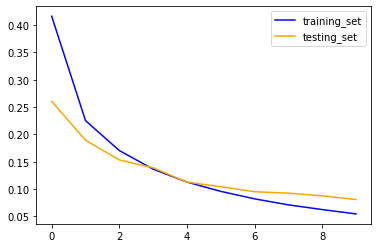

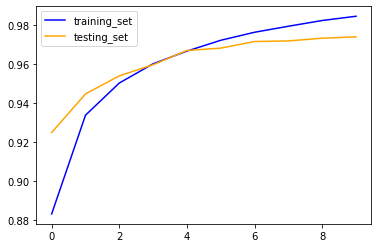

In [ ]:
# History for loss
train_loss = history.history["loss"]
test_loss = history.history["val_loss"]
# START CODE HERE
 
plt.plot(train_loss,color='blue', label="training_set")
plt.plot(test_loss, color='orange',label="testing_set")
plt.legend(["training_set","testing_set"])

# END CODE HERE
plt.show()


# History for accuracy
train_acc= history.history["accuracy"]
test_acc = history.history["val_accuracy"]
# START CODE HERE
 
plt.plot(train_acc, color='blue', label='training_set')
plt.plot(test_acc, color='orange', label='testing_set')
plt.legend(["training_set","testing_set"])

# END CODE HERE
plt.show()


313/313 [==============================] - 1s 2ms/step
According to your model, the handwritten number shown is 7.


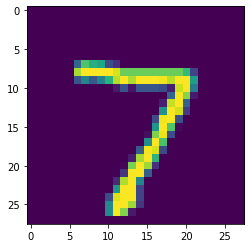

In [ ]:
plt.imshow(x_test[0])
print("According to your model, the handwritten number shown is {}.".format(np.argmax(model.predict(x_test_reshape)[0])))

313/313 [==============================] - 1s 3ms/step
According to your model, the handwritten number shown is 6.


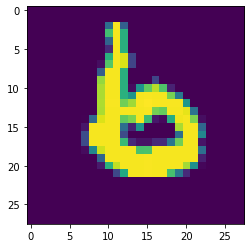

In [ ]:
plt.imshow(x_test[587])
print("According to your model, the handwritten number shown is {}.".format(np.argmax(model.predict(x_test_reshape)[587])))